In [ ]:
! pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=3ac27a9ad22d17daaa71be3d509fb6262922c8e70642884afc185f5e5df5fd4c
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [ ]:
import numpy as np
import pandas as pd
from word2number import w2n
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
data = pd.read_csv("/content/Clean_Dataset.csv")

data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
data = data.drop('flight', axis=1)

In [ ]:
data.isnull().sum()

Unnamed: 0          0
airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
for i in range(len(data)):
    if data['stops'][i] == 'two_or_more':
        data['stops'][i] = 2
    else:
        try:
            data['stops'][i] = w2n.word_to_num(str(data['stops'][i]))
        except ValueError as e:
            print(f"Error processing value at index {i}: {data['stops'][i]} - {e}")

<ipython-input-7-cfb19bf867d1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stops'][i] = w2n.word_to_num(str(data['stops'][i]))
<ipython-input-7-cfb19bf867d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stops'][i] = 2


In [ ]:
categorical_columns = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class']
data_encoded = pd.get_dummies(data, columns=categorical_columns)
print(data_encoded)
print(data_encoded.columns)

        Unnamed: 0 stops  duration  days_left  price  airline_AirAsia  \
0                0     0      2.17          1   5953                0   
1                1     0      2.33          1   5953                0   
2                2     0      2.17          1   5956                1   
3                3     0      2.25          1   5955                0   
4                4     0      2.33          1   5955                0   
...            ...   ...       ...        ...    ...              ...   
300148      300148     1     10.08         49  69265                0   
300149      300149     1     10.42         49  77105                0   
300150      300150     1     13.83         49  79099                0   
300151      300151     1     10.00         49  81585                0   
300152      300152     1     10.08         49  81585                0   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
0                       0                 

In [ ]:
data_encoded.head()

,Unnamed: 0,stops,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
1,1,0,2.33,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
2,2,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,3,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,4,0,2.33,1,5955,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [ ]:
X=data_encoded[data_encoded.columns[~data_encoded.columns.isin(['price'])]]

y=data_encoded['price']

In [ ]:
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

In [ ]:
imputer_target = SimpleImputer(strategy='mean')
y_train = imputer_target.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [ ]:
# Choose the number of neighbors (k) - you may need to experiment with different values
k = 5
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = knn_model.predict(X_test_scaled)

In [ ]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_train: (240122,)
Shape of y_pred: (60031,)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 13834074.571430761
R-squared: 0.9731628510217192


In [21]:
for k in range(1, 5):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    print(f'k={k}, R-squared: {r2}')

k=1, R-squared: 0.9590794621452894
k=2, R-squared: 0.9714936823560136
k=3, R-squared: 0.9739864186049855
k=4, R-squared: 0.9736046338815165


In [24]:
# Use the same scaler instance used during training
scaler = scaler  # Replace with the actual scaler instance used during training

# Assuming 'new_data' is a DataFrame with the same features as your original data
# Replace this with your actual new data
new_data = pd.DataFrame({
    'Unnamed: 0': [1],
    'stops': [1],
    'duration': [0],
    'days_left': [1],
    'airline_AirAsia': [1],
    'airline_Air_India': [1],
    'airline_GO_FIRST': [0],
    'airline_Indigo': [0],
    'airline_SpiceJet': [1],
    'airline_Vistara':[0],
    'source_city_Bangalore' : [0],
    'source_city_Chennai':[1],
    'source_city_Delhi':[1],
    'source_city_Hyderabad':[0],
    'source_city_Kolkata':[0],
    'source_city_Mumbai':[1],
    'departure_time_Afternoon' :[1],
    'departure_time_Early_Morning' :[0],
    'departure_time_Evening' :[1],
    'departure_time_Late_Night' : [0],
    'departure_time_Morning': [1],
    'departure_time_Night' : [0],
    'arrival_time_Afternoon':[0],
    'arrival_time_Early_Morning':[0],
    'arrival_time_Evening':[0],
    'arrival_time_Late_Night': [0],
    'arrival_time_Morning': [0],
    'arrival_time_Night': [1],
    'destination_city_Bangalore': [0],
    'destination_city_Chennai': [0],
    'destination_city_Delhi': [0],
    'destination_city_Hyderabad':[1],
    'destination_city_Hyderabad': [0],
    'destination_city_Kolkata': [0],
    'destination_city_Mumbai': [0],
    'class_Business':[1],
    'class_Economy': [1]
})

# Apply the same preprocessing to new data
new_data_scaled = scaler.transform(new_data)

# Make predictions using the trained model
predicted_fare = knn_model.predict(new_data_scaled)
print(f'Predicted Fare: {predicted_fare}')


Predicted Fare: [9689.]


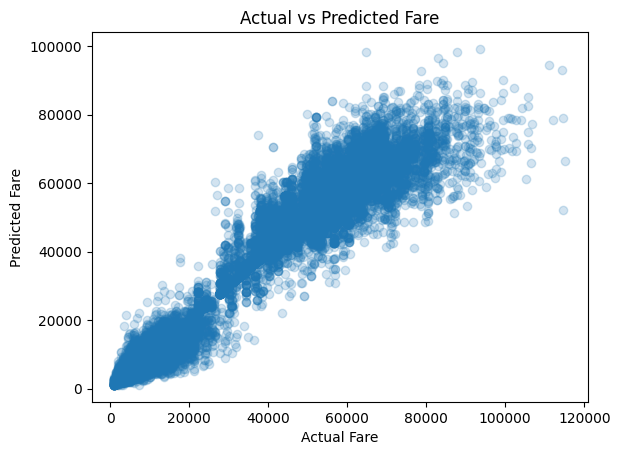

In [26]:
import matplotlib.pyplot as plt

# Assuming 'y_test' is the actual fares for your test set
# 'y_pred' is the predicted fares from your KNN model

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.2)
plt.title('Actual vs Predicted Fare')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.show()